# EXCEED Python Qualtrics Survey - Visualization

This notebook provides visualizations of the EXCEED Python Qualtrics survey data. The goal is to visualize some of the key metrics and respondents' results to better understand the survey questions and the participants' performance. Put simply, this notebook is a companion to the first 2 notebooks.


## Step 0.1: Install Required Libraries

Prior to running the analysis, ensure that the required libraries are installed. For this, you need only install the libraries defined in the `requirements.txt` file. You can do this by running the following command in your terminal:

```bash
pip install -r requirements.txt
```

In [1]:
%pip install -r requirements.txt


[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


## Step 0.2: Load the data

For this step, we need to load the 3 CSV files that were generated in the previous notebooks:
1. `item_stats.csv`: Contains the statistics for each question in the survey.
2. `question_performance.csv`: Contains the performance of each question in the survey.
3. `top2_items.csv`: Contains the top 2 questions (items) for each block based on the performance.

In [2]:
import pandas as pd

saved_df_path = "../data/processed/"

# Load all required dataframes from CSV files from previous notebooks
stats_df = pd.read_csv(saved_df_path + "item_stats.csv", sep=',')
top2_df = pd .read_csv(saved_df_path + "top2_items.csv", sep=',')
question_perf_df = pd.read_csv(saved_df_path + "question_performance.csv", sep=',')

## Step 1: Visualize Difficulty Histogram

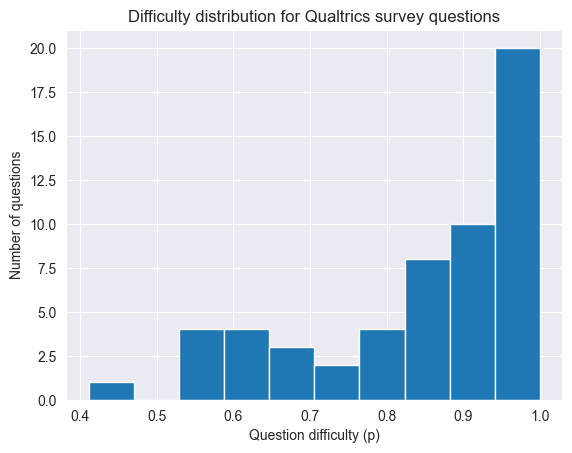

In [3]:
import matplotlib.pyplot as plt

plt.figure()
stats_df['p'].hist(bins=10)
plt.title('Difficulty distribution for Qualtrics survey questions')
plt.xlabel('Question difficulty (p)')
plt.ylabel('Number of questions')
plt.show()

## Step 2.1: More Visualizations for Question Performance

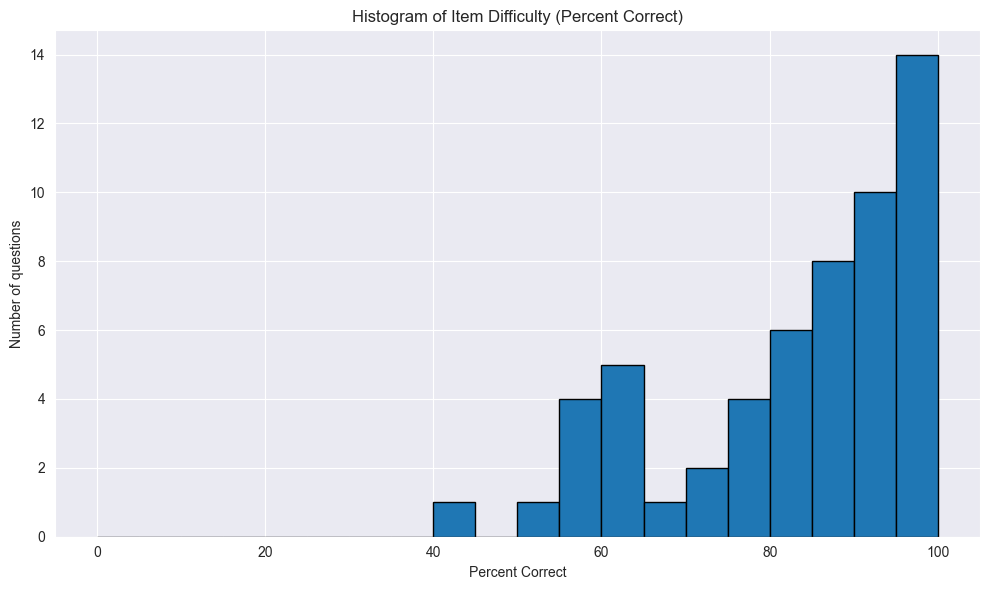

In [4]:
import numpy as np

# Ensure the '% correct' column is numeric
question_perf_df['% correct'] = pd.to_numeric(question_perf_df['% correct'], errors='coerce')

# Create histogram of item difficulty (5-pt bins, 0-100)
plt.figure(figsize=(10, 6))
plt.hist(
    question_perf_df['% correct'].dropna(),
    bins=np.arange(0, 105, 5),
    edgecolor='black'
)
plt.xlabel('Percent Correct')
plt.ylabel('Number of questions')
plt.title('Histogram of Item Difficulty (Percent Correct)')
plt.tight_layout()
plt.show()

## Step 2.2: Horizontal Bar Chart of Question Performance

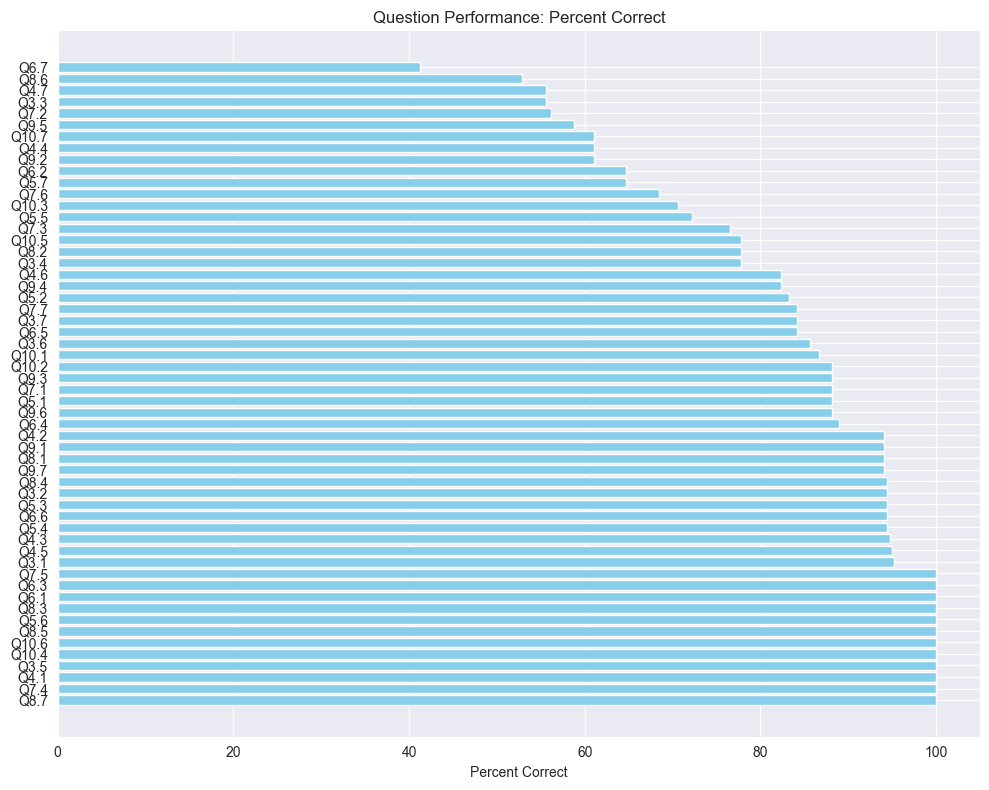

In [5]:
df_sorted_q_perf = question_perf_df.sort_values(by='% correct', ascending=False)

plt.figure(figsize=(10, 8))
plt.barh(df_sorted_q_perf['Question'], df_sorted_q_perf['% correct'], color='skyblue')
plt.xlabel('Percent Correct')
plt.title('Question Performance: Percent Correct')
plt.tight_layout()
plt.show()

## Step 3.1: Visualize Distribution of Self-Reported Python YoE

It is important to visualize the distribution of self-reported Python years of experience (YoE) to understand how participants perceive their own experience with Python. This can help identify ways to segment the data for further analysis of the survey results.

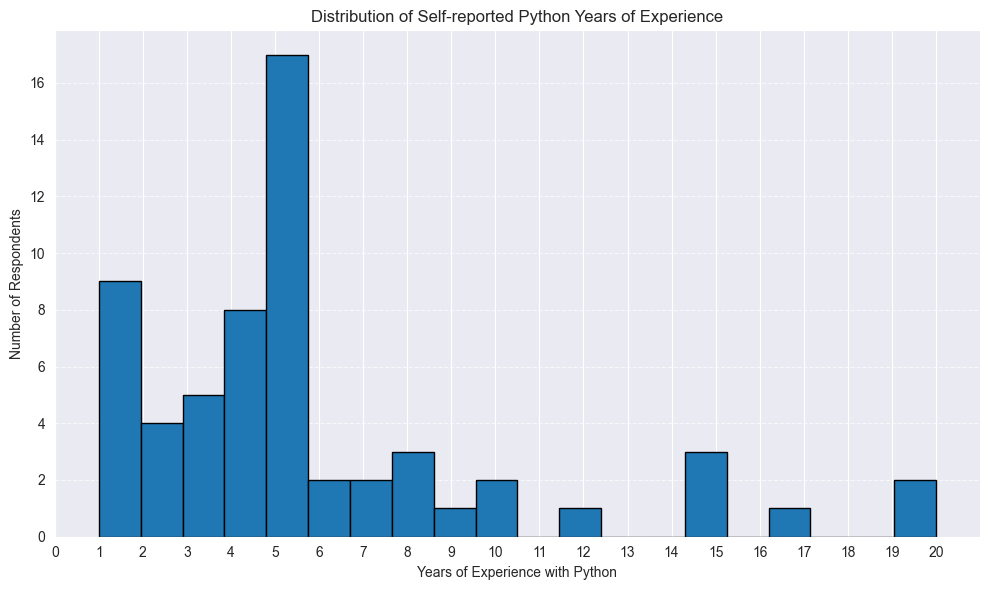

In [6]:
# Set the path to the Qualtrics CSV file (adjust as needed, but default is in the same directory)
file_path = "../data/survey_results_02_06_2025.csv"

# 1. Load data (Qualtrics exports are semicolon‑delimited by default)
df = pd.read_csv(file_path, sep=';')

# 2. Keep only respondents who finished the survey
c_df = df[df["Finished"] == 1].copy()

# 3. Visualize distribution of self-reported Python YoE
plt.figure(figsize=(10, 6))
c_df['Q2.2'].hist(bins=20, edgecolor='black')
plt.title('Distribution of Self-reported Python Years of Experience')
plt.xlabel('Years of Experience with Python')
plt.ylabel('Number of Respondents')
plt.xticks(range(0, int(c_df['Q2.2'].max()) + 1))
plt.xlim(0, c_df['Q2.2'].max() + 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## Step 3.2. Visualize Distribution of Self-Reported General Programming YoE

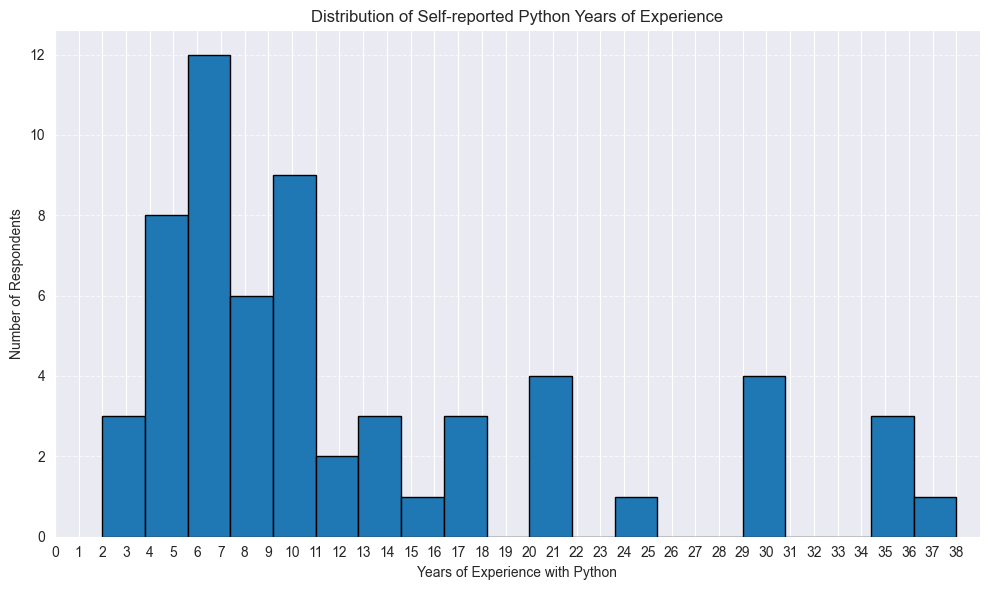

In [7]:
# Set the path to the Qualtrics CSV file (adjust as needed, but default is in the same directory)
file_path = "../data/survey_results_02_06_2025.csv"

# 1. Load data (Qualtrics exports are semicolon‑delimited by default)
df = pd.read_csv(file_path, sep=';')

# 2. Keep only respondents who finished the survey
c_df = df[df["Finished"] == 1].copy()

# 3. Visualize distribution of self-reported Python YoE
plt.figure(figsize=(10, 6))
c_df['Q2.3'].hist(bins=20, edgecolor='black')
plt.title('Distribution of Self-reported Python Years of Experience')
plt.xlabel('Years of Experience with Python')
plt.ylabel('Number of Respondents')
plt.xticks(range(0, int(c_df['Q2.3'].max()) + 1))
plt.xlim(0, c_df['Q2.3'].max() + 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## Step 3.3: Visualize Python YoE vs General Programming YoE by Dreyfus Skill Level (Scatterplot)

This step visualizes the relationship between Python YoE, General Programming YoE, and self-reported Dreyfus skill level.
The scatterplot will show how these 3 variables related to each other. However, do note that all of these 3 values are self-reported, and thus may not be accurate (either over- or under-reported by the respondents).

On top of this, most likely this scatterplot will not be easily interpretable when there are many points overlapping each other.

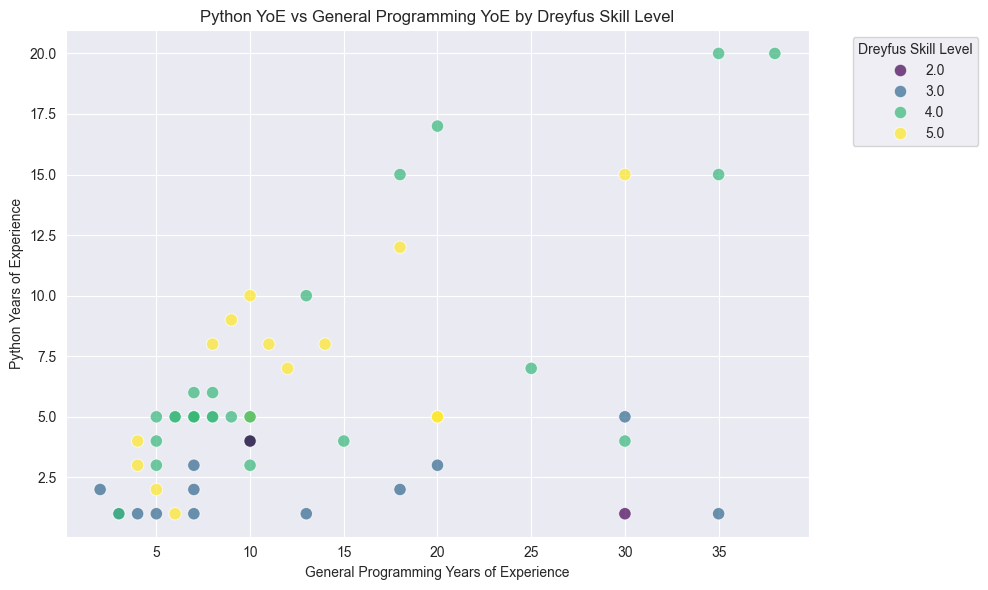

In [8]:
import seaborn as sns

# Ensure numeric types for YoE columns
c_df["Python_YoE"]  = pd.to_numeric(c_df["Q2.2"], errors="coerce")
c_df["General_YoE"] = pd.to_numeric(c_df["Q2.3"], errors="coerce")
c_df["Dreyfus_Level"] = pd.to_numeric(c_df["Q2.1"], errors="coerce")

# Drop rows with missing values in any of the three columns
plot_df = c_df.dropna(subset=["Python_YoE", "General_YoE", "Dreyfus_Level"])

# Create a scatter plot of Python YoE vs General Programming YoE, colored by Dreyfus skill level
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=plot_df,
    x="General_YoE",
    y="Python_YoE",
    hue="Dreyfus_Level",
    palette="viridis",
    alpha=0.7,
    s=80
)
plt.xlabel("General Programming Years of Experience")
plt.ylabel("Python Years of Experience")
plt.title("Python YoE vs General Programming YoE by Dreyfus Skill Level")
plt.legend(title="Dreyfus Skill Level", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

## Step 3.4: Visualize Python YoE by Dreyfus Skill Level (Boxplot)


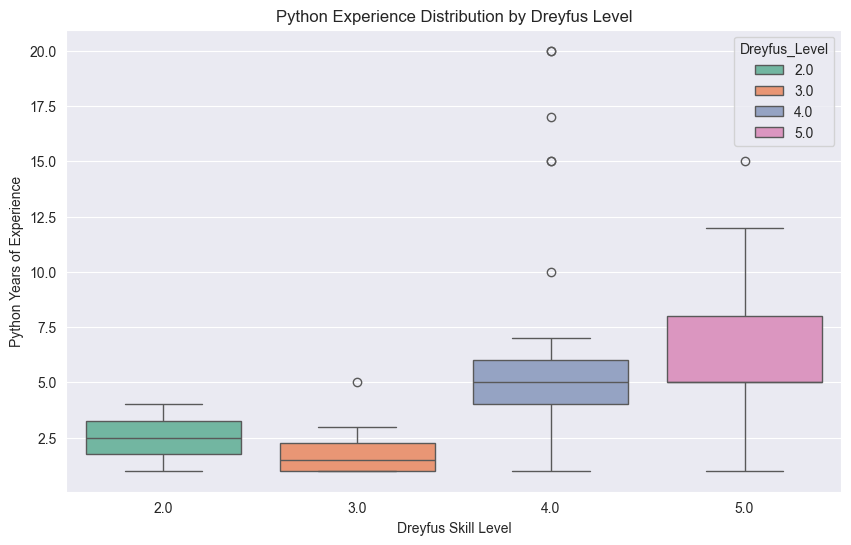

In [9]:
plt.figure(figsize=(10, 6))

# Create a boxplot of Python YoE by Dreyfus skill level
sns.boxplot(data=plot_df, x="Dreyfus_Level", y="Python_YoE", palette="Set2", hue="Dreyfus_Level")
plt.title("Python Experience Distribution by Dreyfus Level")
plt.xlabel("Dreyfus Skill Level")
plt.ylabel("Python Years of Experience")
plt.show()

## Step 4: Several Visualizations for Self-Reported Python YoE

,count,mean,std,min,25%,50%,75%,max
Python_YoE,60.0,5.700000,4.555868,1.0,3.0,5.0,6.25,20.0
General_YoE,60.0,12.766667,9.408555,2.0,7.0,10.0,18.00,38.0


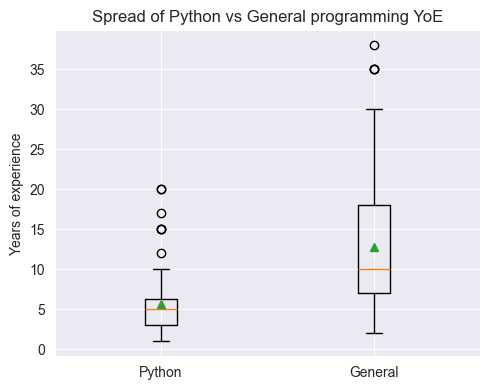

In [10]:
# Ensure numeric
c_df["Python_YoE"]  = pd.to_numeric(c_df["Q2.2"], errors="coerce")
c_df["General_YoE"] = pd.to_numeric(c_df["Q2.3"], errors="coerce")

# ---------------- Summary table ----------------
summary = (
    c_df[["Python_YoE", "General_YoE"]]
      .describe()          # count, mean, std, min, 25 %, 50 %, 75 %, max
      .transpose()         # nicer orientation: rows = variables
)

# Display the summary table
from IPython.display import display
display(summary)

# ---------------- Simple visual: side‑by‑side boxplots ----------------
plt.figure(figsize=(5,4))
plt.boxplot(
    [c_df["Python_YoE"].dropna(), c_df["General_YoE"].dropna()],
    tick_labels=["Python", "General"],
    showmeans=True
)
plt.ylabel("Years of experience")
plt.title("Spread of Python vs General programming YoE")
plt.tight_layout()
plt.show()
